Мохляков П.А. \
М8О-408Б-19 \
Вариант 3

## Лабораторная работа 6

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import tqdm

Класс сети Кохонена

In [2]:
class SOM:
    def __init__(self, features:int, width:int, height:int):
        self._features = features
        self._width = width
        self._height = height
        self._weights = np.random.randn(width*height,features)
        cords = np.array([[x, y] for y in range(height) for x in range(width)])
        self._distanses = np.zeros((width*height, width*height))
        for i, point in enumerate(cords):
            self._distanses[i] = np.linalg.norm(cords - point, axis=1)
    
    def update(self, x, ef_width, lr):
        x_distanses = np.linalg.norm(self._weights - x, axis=1)
        win_point = np.argmin(x_distanses)
        for i, d in enumerate(self._distanses[win_point]):
            tn = np.exp(-d**2 / (2*ef_width**2))
            self._weights[i] += (x - self._weights[i])*lr*tn
            
    def train(self, train_data, epoch, start_lr):
        start_ef_width = max(self._width, self._height) / 2
        ef_width_rate = epoch / np.log(start_ef_width)
        shuffle_data = copy.copy(train_data)
        for i in tqdm.tqdm(range(epoch)):
            np.random.shuffle(shuffle_data)
            ef_width = start_ef_width*np.exp(-i / ef_width_rate)
            lr = start_lr*np.exp(-i / epoch)
            for x in shuffle_data:
                self.update(x, ef_width, lr)
                
    @property
    def weights(self):
        return np.array(self._weights.reshape((self._height,self._width, self._features)))
    
    @property
    def weights_scaled(self):
        return ((self._weights - np.min(self._weights, axis=0)) / (np.max(self._weights, axis=0) - np.min(self._weights, axis=0))).reshape((self._height,self._width, self._features))
        
            

Входные данные

In [3]:
data = [[0, 0.7], 
        [0.3, -1.3], 
        [-1.3, 0.8], 
        [1.2, 0.1], 
        [-1.2, 0.9],
        [-0.5, -0.7],
        [0.7, -1.5],
        [-1.4, 0.5],
        [0.3, 0],
        [0.6, 0.6],
        [0.8, -0.7],
        [0.5, 0.1]
        ]


Содаем объект модели

In [4]:
model = SOM(2,50,50)

Тренеруем модель

In [5]:
model.train(data, 150, 1)

100%|█████████████████████████████████████████████████████████████████████████████████| 150/150 [00:24<00:00,  6.21it/s]


Результат

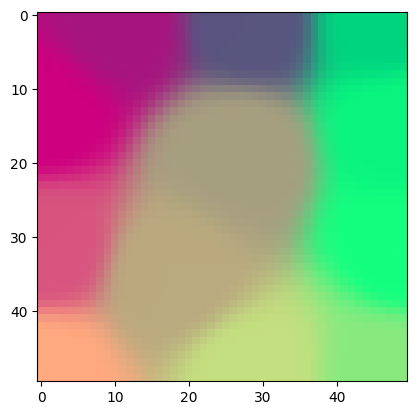

In [6]:
plt.imshow(np.insert(model.weights_scaled, 2, 0.5, axis = 2))